# "Euphotic zone residence time of Antarctic Bottom Water"

### Code for Visualizing the Euphotic Zone Residence Locations 

Used for generating Figure S5 f and  g

Corresponding to Yinghuan Xie (yinghuan.xie@utas.edu.au)

(Note that this script is based on "Main_Figure2_Residence_loc_map.ipynb")

In [10]:
# Define the threshld for euphotic zone PAR in (watts per square metres)
# 2  mol/m^2/day: 5.439369304008213
# 3  mol/m^2/day: 8.15905395601232
# 4  mol/m^2/day: 10.878738608016427
PARZ_thre = 8.159
PARZ_thre_L = 5.439
PARZ_thre_U = 10.879

In [1]:
# Importing the relevant modules. 
import numpy as np
import xarray as xr
import math
import time
import datetime as dt
from datetime import timedelta
import calendar
import os
import re
from glob import glob
#
import netCDF4 as nc
import pandas as pd
import gsw
#
import cartopy.crs as ccrs
from scipy.io import loadmat
#
import matplotlib.pyplot as plt
import matplotlib.colors as col

#
import cosima_cookbook as cc
#session =cc.database.create_session('cosima_master_2022-08-30.db')
session =cc.database.create_session()
expt = '01deg_jra55v13_ryf9091'
#
from os import sys
sys.path.append('/home/581/yx9454/PhD_Ch1')
from My_Py_Func import Ch1_defs as c1d

import pygamma

In [2]:
# In each experiment, we define 06-18, release-06, 05-release, 87-05,
# loop_start_point-87 (if availiable) as No 0,1,2,3,4(if availiable)

master_path = '/g/data/jk72/yx9454/runs/parcels/output_after_Aug/'
traj_input = {'MLS_ON':[{'out_freq': 5,
                        'exp_path':'CORE_Curtain_Forward(out_freq=5days)_Following_MLS_ON/'},
                        {'out_freq': 5,
                        'exp_path':'CORE_Curtain_Forward(out_freq=5days)_Jan-Dec_MLS_ON/'},
                        {'out_freq': 0.25,
                        'exp_path':'CORE_Curtain_Backwards(out_freq=6hrs)_Jan-Dec_MLS_ON/'},
                        {'out_freq': 0.25,
                        'exp_path':'CORE_Curtain_Backwards(out_freq=6hrs)_Following_MLS_ON/'},
                        {'out_freq': 0.25,
                        'exp_path':'CORE_Curtain_Backwards(out_freq=6hrs)_Following_Loop_MLS_ON/'}],
              'MLS_OFF':[{'out_freq': 5,
                        'exp_path':'CORE_Curtain_Forward(out_freq=5days)_Following_MLS_OFF/'},
                        {'out_freq': 5,
                        'exp_path':'CORE_Curtain_Forward(out_freq=5days)_Jan-Dec_MLS_OFF/'},
                        {'out_freq': 5,
                        'exp_path':'CORE_Curtain_Backwards(out_freq=5day)_Jan-Dec_MLS_OFF/'},
                        {'out_freq': 5,
                        'exp_path':'CORE_Curtain_Backwards(out_freq=5days)_Following_MLS_OFF/'},
                        {'out_freq': 5,
                        'exp_path':'CORE_Curtain_Backwards(out_freq=5days)_Following_Loop_MLS_OFF/'}],
              'MLS_Weak':[{'out_freq': 5,
                        'exp_path':'CORE_Curtain_Forward(out_freq=5days)_Following_MLS_ON_middle_forw/'},
                        {'out_freq': 5,
                        'exp_path':'CORE_Curtain_Forward(out_freq=5days)_Jan-Dec_MLS_ON_middle_forw/'},
                          {'out_freq': 0.25,
                        'exp_path':'CORE_Curtain_Backwards(out_freq=6hrs)_Jan-Dec_MLS_ON_middle_back/'},
                        {'out_freq': 0.25,
                        'exp_path':'CORE_Curtain_Backwards(out_freq=6hrs)_Following_MLS_ON_middle_back/'},
                        ]
        }

## If we need to anaysis MLS OFF version, execute the following chunks

In [3]:
%%time
# Load traj files 0
# From 5days freq npz file
var_in_arrs_0_MLS_OFF = {}
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/MLS_OFF/var_in_arrs_0.npz')
var_in_arrs_0_MLS_OFF['x']   =npzfile['x']
var_in_arrs_0_MLS_OFF['y']   =npzfile['y']
var_in_arrs_0_MLS_OFF['z']   =npzfile['z']
var_in_arrs_0_MLS_OFF['timeshort'] = npzfile['time']

npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/MLS_OFF/var_in_arrs_0_CS_Eu_date.npz')
var_in_arrs_0_MLS_OFF['CS_Eu_date']=npzfile['CS_Eu_date']

# Load traj files 1
# From 5days freq npz file
var_in_arrs_1_MLS_OFF = {}
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/MLS_OFF/var_in_arrs_1.npz')
var_in_arrs_1_MLS_OFF['x']   =npzfile['x']
var_in_arrs_1_MLS_OFF['y']   =npzfile['y']
var_in_arrs_1_MLS_OFF['z']   =npzfile['z']
var_in_arrs_1_MLS_OFF['timeshort'] = npzfile['time']

npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/MLS_OFF/var_in_arrs_1_CS_Eu_date.npz')
var_in_arrs_1_MLS_OFF['CS_Eu_date']=npzfile['CS_Eu_date']

# Load traj files 3
# From 5days freq npz file
var_in_arrs_3_MLS_OFF = {}
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/MLS_OFF/var_in_arrs_3.npz')
var_in_arrs_3_MLS_OFF['x']   =npzfile['x']
var_in_arrs_3_MLS_OFF['y']   =npzfile['y']
var_in_arrs_3_MLS_OFF['z']   =npzfile['z']
var_in_arrs_3_MLS_OFF['timeshort'] = npzfile['time']

npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/MLS_OFF/var_in_arrs_3_CS_Eu_date.npz')
var_in_arrs_3_MLS_OFF['CS_Eu_date']=npzfile['CS_Eu_date']


# Load traj files 2
# From 5days freq npz file
var_in_arrs_2_MLS_OFF = {}
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/MLS_OFF/var_in_arrs_2.npz')
var_in_arrs_2_MLS_OFF['x']   =npzfile['x']
var_in_arrs_2_MLS_OFF['y']   =npzfile['y']
var_in_arrs_2_MLS_OFF['z']   =npzfile['z']
var_in_arrs_2_MLS_OFF['timeshort'] = npzfile['time']

npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/MLS_OFF/var_in_arrs_2_CS_Eu_date.npz')
var_in_arrs_2_MLS_OFF['CS_Eu_date']=npzfile['CS_Eu_date']

# Load traj files 4
# From 5days freq npz file
var_in_arrs_4_MLS_OFF = {}
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/MLS_OFF/var_in_arrs_4.npz')
var_in_arrs_4_MLS_OFF['x']   =npzfile['x']
var_in_arrs_4_MLS_OFF['y']   =npzfile['y']
var_in_arrs_4_MLS_OFF['z']   =npzfile['z']
var_in_arrs_4_MLS_OFF['timeshort'] = npzfile['time']

npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/MLS_OFF/var_in_arrs_4_CS_Eu_date.npz')
var_in_arrs_4_MLS_OFF['CS_Eu_date']=npzfile['CS_Eu_date']

CPU times: user 2min 21s, sys: 2min 13s, total: 4min 34s
Wall time: 4min 39s


In [33]:
AABW_inds_MLS_OFF = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/MLS_OFF/AABW_inds.npz')['AABW_inds']
#
stopsign_list = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/MLS_OFF/stopsign_list_for_20yrs_150m_thre.npz')['stopsign_list']
CDW_inds_MLS_OFF = ~(np.isnan(stopsign_list))
#
AABW_shallower_than_EZD_plus_CDW_MLS_OFF =  (var_in_arrs_0_MLS_OFF['CS_Eu_date'][:,-1]>0) & (CDW_inds_MLS_OFF)
sum(AABW_shallower_than_EZD_plus_CDW_MLS_OFF)

7976

## Load MLS_Weak if we need

In [5]:
%%time
# Load traj files 0
# From 5days freq npz file
var_in_arrs_0_MLS_Weak = {}
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/MLS_Weak/var_in_arrs_0.npz')
var_in_arrs_0_MLS_Weak['x']   =npzfile['x']
var_in_arrs_0_MLS_Weak['y']   =npzfile['y']
var_in_arrs_0_MLS_Weak['z']   =npzfile['z']
var_in_arrs_0_MLS_Weak['timeshort'] = npzfile['time']

npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/MLS_Weak/var_in_arrs_0_CS_Eu_date.npz')
var_in_arrs_0_MLS_Weak['CS_Eu_date']=npzfile['CS_Eu_date']


# Load traj files 1
# From 5days freq npz file
var_in_arrs_1_MLS_Weak = {}
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/MLS_Weak/var_in_arrs_1.npz')
var_in_arrs_1_MLS_Weak['x']   =npzfile['x']
var_in_arrs_1_MLS_Weak['y']   =npzfile['y']
var_in_arrs_1_MLS_Weak['z']   =npzfile['z']
var_in_arrs_1_MLS_Weak['timeshort'] = npzfile['time']

npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/MLS_Weak/var_in_arrs_1_CS_Eu_date.npz')
var_in_arrs_1_MLS_Weak['CS_Eu_date']=npzfile['CS_Eu_date']


# Load traj files 2
# From 5days freq npz file
var_in_arrs_2_MLS_Weak = {}
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/MLS_Weak/var_in_arrs_2_5days_freq.npz')
var_in_arrs_2_MLS_Weak['x']   =npzfile['x']
var_in_arrs_2_MLS_Weak['y']   =npzfile['y']
var_in_arrs_2_MLS_Weak['z']   =npzfile['z']
var_in_arrs_2_MLS_Weak['timeshort'] = npzfile['time']

npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/MLS_Weak/var_in_arrs_2_CS_Eu_date.npz')
var_in_arrs_2_MLS_Weak['CS_Eu_date']=npzfile['CS_Eu_date']


# Load traj files 3
# From 5days freq npz file
var_in_arrs_3_MLS_Weak = {}
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/MLS_Weak/var_in_arrs_3_5days_freq.npz')
var_in_arrs_3_MLS_Weak['x']   =npzfile['x']
var_in_arrs_3_MLS_Weak['y']   =npzfile['y']
var_in_arrs_3_MLS_Weak['z']   =npzfile['z']
var_in_arrs_3_MLS_Weak['timeshort'] = npzfile['time']

npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/MLS_Weak/var_in_arrs_3_CS_Eu_date.npz')
var_in_arrs_3_MLS_Weak['CS_Eu_date']=npzfile['CS_Eu_date']

#
# MLS_Weak does not have var in arrs 4
#

CPU times: user 1min 31s, sys: 1min 7s, total: 2min 39s
Wall time: 2min 44s


In [6]:
AABW_inds_MLS_Weak = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/MLS_Weak/AABW_inds.npz')['AABW_inds']
#
stopsign_list = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/MLS_Weak/stopsign_list_for_10yrs_150m_thre.npz')['stopsign_list']
CDW_inds_MLS_Weak = ~(np.isnan(stopsign_list))
#
AABW_shallower_than_EZD_plus_CDW_MLS_Weak =  (var_in_arrs_0_MLS_Weak['CS_Eu_date'][:,-1]>0) & (CDW_inds_MLS_Weak)
sum(AABW_shallower_than_EZD_plus_CDW_MLS_Weak)

13925

## Load PARZ for MLS ON / OFF and Weak versions

### Load datetime we need from MLS ON files

In [16]:
%%time
var_in_arrs_1,var_in_arrs_2,var_in_arrs_3 = {},{},{}


exp_name = 'MLS_ON'
'''
# Load traj files 0
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_0_datetime.npz',allow_pickle=True)
var_in_arrs_0['datetime']   =npzfile['datetime']
#var_in_arrs_0['Pt_ind']   =npzfile['Pt_ind']
'''
# Load traj files 1
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_1_datetime.npz',allow_pickle=True)
var_in_arrs_1['datetime']   =npzfile['datetime']
#var_in_arrs_1['Pt_ind']   =npzfile['Pt_ind']

# Load traj files 2
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_2_datetime.npz',allow_pickle=True)
var_in_arrs_2['datetime']   =npzfile['datetime']
#var_in_arrs_2['Pt_ind']   =npzfile['Pt_ind']

# Manually reset
#traj_input[exp_name][3]['out_freq'] = 5

# Load traj files 3
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_3_datetime.npz',allow_pickle=True)
var_in_arrs_3['datetime']   =npzfile['datetime']
#var_in_arrs_3['Pt_ind']   =npzfile['Pt_ind']

# Manually reset
#traj_input[exp_name][2]['out_freq'] = 5
'''
# Load traj files 4
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_4_datetime.npz',allow_pickle=True)
var_in_arrs_4['datetime']   =npzfile['datetime']
#var_in_arrs_4['Pt_ind']   =npzfile['Pt_ind']
'''


CPU times: user 10.4 ms, sys: 6.14 ms, total: 16.6 ms
Wall time: 109 ms


"\n# Load traj files 4\n# From 5days freq npz file\nnpzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_4_datetime.npz',allow_pickle=True)\nvar_in_arrs_4['datetime']   =npzfile['datetime']\n#var_in_arrs_4['Pt_ind']   =npzfile['Pt_ind']\n"

In [7]:
%%time
exp_name = 'MLS_OFF'

# Load traj files 0
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/'+exp_name+'/Chl-a_based_on_OCCCI_v6/var_in_arrs_0_AABW_only_PARS_Z.npz')
var_in_arrs_0_MLS_OFF['PARZ']   =npzfile['PARZ']
#var_in_arrs_0['Pt_ind']   =npzfile['Pt_ind']

# Load traj files 1
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/'+exp_name+'/Chl-a_based_on_OCCCI_v6/var_in_arrs_1_AABW_only_PARS_Z.npz')
var_in_arrs_1_MLS_OFF['PARZ']   =npzfile['PARZ']
#var_in_arrs_1['Pt_ind']   =npzfile['Pt_ind']

# Load traj files 2
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/'+exp_name+'/Chl-a_based_on_OCCCI_v6/var_in_arrs_2_AABW_only_PARS_Z.npz')
var_in_arrs_2_MLS_OFF['PARZ']   =npzfile['PARZ']
#var_in_arrs_2['Pt_ind']   =npzfile['Pt_ind']

# Manually reset
#traj_input[exp_name][3]['out_freq'] = 5

# Load traj files 3
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/'+exp_name+'/Chl-a_based_on_OCCCI_v6/var_in_arrs_3_AABW_only_PARS_Z.npz')
var_in_arrs_3_MLS_OFF['PARZ']   =npzfile['PARZ']
#var_in_arrs_3['Pt_ind']   =npzfile['Pt_ind']

# Manually reset
#traj_input[exp_name][2]['out_freq'] = 5

# Load traj files 4
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/'+exp_name+'/Chl-a_based_on_OCCCI_v6/var_in_arrs_4_AABW_only_PARS_Z.npz')
var_in_arrs_4_MLS_OFF['PARZ']   =npzfile['PARZ']
#var_in_arrs_4['Pt_ind']   =npzfile['Pt_ind']



CPU times: user 3.81 s, sys: 3.46 s, total: 7.27 s
Wall time: 9.58 s


In [8]:
%%time
exp_name = 'MLS_Weak'

# Load traj files 0
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/'+exp_name+'/Chl-a_based_on_OCCCI_v6/var_in_arrs_0_AABW_only_PARS_Z.npz')
var_in_arrs_0_MLS_Weak['PARZ']   =npzfile['PARZ']
#var_in_arrs_0['Pt_ind']   =npzfile['Pt_ind']

# Load traj files 1
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/'+exp_name+'/Chl-a_based_on_OCCCI_v6/var_in_arrs_1_AABW_only_PARS_Z.npz')
var_in_arrs_1_MLS_Weak['PARZ']   =npzfile['PARZ']
#var_in_arrs_1['Pt_ind']   =npzfile['Pt_ind']

# Load traj files 2
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/'+exp_name+'/Chl-a_based_on_OCCCI_v6/var_in_arrs_2_AABW_only_PARS_Z_5days.npz')
var_in_arrs_2_MLS_Weak['PARZ']   =npzfile['PARZ']
#var_in_arrs_2['Pt_ind']   =npzfile['Pt_ind']

# Manually reset
#traj_input[exp_name][3]['out_freq'] = 5

# Load traj files 3
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/'+exp_name+'/Chl-a_based_on_OCCCI_v6/var_in_arrs_3_AABW_only_PARS_Z_5days.npz')
var_in_arrs_3_MLS_Weak['PARZ']   =npzfile['PARZ']
#var_in_arrs_3['Pt_ind']   =npzfile['Pt_ind']

# Manually reset
#traj_input[exp_name][2]['out_freq'] = 5
'''
# Load traj files 4
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/'+exp_name+'/Chl-a_based_on_OCCCI_v6/var_in_arrs_4_AABW_only_PARS_Z.npz')
var_in_arrs_4_MLS_Weak['PARZ']   =npzfile['PARZ']
#var_in_arrs_4['Pt_ind']   =npzfile['Pt_ind']
'''


CPU times: user 2.37 s, sys: 1.69 s, total: 4.06 s
Wall time: 5.28 s


"\n# Load traj files 4\n# From 5days freq npz file\nnpzfile = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/'+exp_name+'/Chl-a_based_on_OCCCI_v6/var_in_arrs_4_AABW_only_PARS_Z.npz')\nvar_in_arrs_4_MLS_Weak['PARZ']   =npzfile['PARZ']\n#var_in_arrs_4['Pt_ind']   =npzfile['Pt_ind']\n"

## Load for plotting maps

In [17]:
def shelf_mask_isobath(var):
    '''
    Masks ACCESS-OM2-01 variables by the region polewards of the 1000m isobath as computed using
    a script contributed by Adele Morrison.
    Only to be used with ACCESS-OM2-0.1 output!
    '''
    contour_file = np.load('/g/data/ik11/grids/Antarctic_slope_contour_1000m.npz')

    shelf_mask = contour_file['contour_masked_above']
    yt_ocean = contour_file['yt_ocean']
    xt_ocean = contour_file['xt_ocean']

    # in this file the points along the isobath are given a positive value, the points outside (northwards)
    # of the isobath are given a value of -100 and all the points on the continental shelf have a value of 0
    # so we mask for the 0 values
    shelf_mask[np.where(shelf_mask!=0)] = np.nan
    shelf_mask = shelf_mask+1
    shelf_map = np.nan_to_num(shelf_mask)
    shelf_mask = xr.DataArray(shelf_mask, coords = [('yt_ocean', yt_ocean), ('xt_ocean', xt_ocean)])
    shelf_map = xr.DataArray(shelf_map, coords = [('yt_ocean', yt_ocean), ('xt_ocean', xt_ocean)])

    # then we want to multiply the variable with the mask so we need to account for the shape of the mask.
    # The mask uses a northern cutoff of 59S.
    masked_var = var.sel(yt_ocean = slice(-90, -59.03)) * shelf_mask
    return masked_var, shelf_map

xt_ocean,yt_ocean,yt_extend,ocean_depth,ocean_depth_extend = c1d.Load_Grid_Data(False)
# Grid inherited from CC Code
ht = cc.querying.getvar(expt,'ht', session, n=1)
ht = ht.sel(yt_ocean = slice(-90, -59))
land_mask = (ht*0).fillna(1)
yt_ocean_cc = ht.yt_ocean.values
xt_ocean_cc = ht.xt_ocean.values
ht_shelf , shelf_mask = shelf_mask_isobath(ht)
ht_all = cc.querying.getvar(expt,'ht', session, n=1)

In [18]:
def PDF3D_num_only(x,y,z,res,z_edge,npts):
  x_here = x.flatten()
  y_here = y.flatten()
  z_here = z.flatten()
  #p_here = psigma2.flatten()

  if res==0.1:
    x_edges,y_edges = np.arange(0,360.1,0.1),np.arange(-80,-29.9,0.1)
    Three_dim_PDF,edges = np.histogramdd((x_here,y_here,z_here),(x_edges,y_edges,z_edge))
    #Three_dim_PDF = (Three_dim_PDF/npts)*100
    #
    boxcenter = [edges[0][:-1]+(0.5*abs(edges[0][0]-edges[0][1])),
                 edges[1][:-1]+(0.5*abs(edges[1][0]-edges[1][1])),
                 edges[2][:-1]+(0.5*abs(edges[2][0]-edges[2][1]))]
    X,Y = np.meshgrid(boxcenter[0], boxcenter[1])
    print('RES=0.1 deg')

  elif res==1:
    x_edges,y_edges = np.arange(0,361,1),np.arange(-80,-29,1)
    Three_dim_PDF,edges = np.histogramdd((x_here,y_here,z_here),(x_edges,y_edges,z_edge))
    Three_dim_PDF = (Three_dim_PDF/npts)*100
    #
    boxcenter = [edges[0][:-1]+(0.5*abs(edges[0][0]-edges[0][1])),
                 edges[1][:-1]+(0.5*abs(edges[1][0]-edges[1][1])),
                 edges[2][:-1]+(0.5*abs(edges[2][0]-edges[2][1]))]
    X,Y = np.meshgrid(boxcenter[0], boxcenter[1])
    print('RES=1 deg')

  else:
    print('Plz choose 0.1 or 1 or build a new def')

  return(X,Y,Three_dim_PDF)

## For CDW+Euphotic>0 only

### MLS On and Off version AABW particles

### For MLS OFF and MLS ON/OFF difference Globar Sectors

In [29]:
%%time

res_map_x = np.ravel(np.concatenate((var_in_arrs_4_MLS_OFF['x'][AABW_inds_MLS_OFF][AABW_shallower_than_EZD_plus_CDW_MLS_OFF],var_in_arrs_3_MLS_OFF['x'][AABW_inds_MLS_OFF][AABW_shallower_than_EZD_plus_CDW_MLS_OFF],var_in_arrs_2_MLS_OFF['x'][AABW_inds_MLS_OFF][AABW_shallower_than_EZD_plus_CDW_MLS_OFF],var_in_arrs_1_MLS_OFF['x'][AABW_inds_MLS_OFF][AABW_shallower_than_EZD_plus_CDW_MLS_OFF]),axis=1),order='C')
res_map_y = np.ravel(np.concatenate((var_in_arrs_4_MLS_OFF['y'][AABW_inds_MLS_OFF][AABW_shallower_than_EZD_plus_CDW_MLS_OFF],var_in_arrs_3_MLS_OFF['y'][AABW_inds_MLS_OFF][AABW_shallower_than_EZD_plus_CDW_MLS_OFF],var_in_arrs_2_MLS_OFF['y'][AABW_inds_MLS_OFF][AABW_shallower_than_EZD_plus_CDW_MLS_OFF],var_in_arrs_1_MLS_OFF['y'][AABW_inds_MLS_OFF][AABW_shallower_than_EZD_plus_CDW_MLS_OFF]),axis=1),order='C')
res_map_z = np.ravel(np.concatenate((var_in_arrs_4_MLS_OFF['CS_Eu_date'][AABW_shallower_than_EZD_plus_CDW_MLS_OFF],var_in_arrs_3_MLS_OFF['CS_Eu_date'][AABW_shallower_than_EZD_plus_CDW_MLS_OFF],var_in_arrs_2_MLS_OFF['CS_Eu_date'][AABW_shallower_than_EZD_plus_CDW_MLS_OFF],var_in_arrs_1_MLS_OFF['CS_Eu_date'][AABW_shallower_than_EZD_plus_CDW_MLS_OFF]),axis=1),order='C')


hist2d_MLS_OFF = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)],weights=res_map_z)
hist2d_pts_MLS_OFF = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)])

CPU times: user 4.76 s, sys: 2.11 s, total: 6.87 s
Wall time: 6.87 s


### Plot the Particle . Day plot

In [34]:
PARZ_threshold = PARZ_threshold

# Euphotic residence PDF + Backwards PDF
# Visualization
# Global first
part_inds = AABW_inds_MLS_OFF #AABW_shallower_than_EZD
inds_here1 = var_in_arrs_1_MLS_OFF['PARZ'][CDW_inds_MLS_OFF]>PARZ_threshold
res_map_x = np.ravel(var_in_arrs_1_MLS_OFF['x'][AABW_inds_MLS_OFF][CDW_inds_MLS_OFF][inds_here1])
res_map_y = np.ravel(var_in_arrs_1_MLS_OFF['y'][AABW_inds_MLS_OFF][CDW_inds_MLS_OFF][inds_here1])
res_map_z = np.ones(res_map_y.shape)
hist2d_pts_1 = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)])

inds_here2 = var_in_arrs_2_MLS_OFF['PARZ'][CDW_inds_MLS_OFF]>PARZ_threshold
res_map_x = np.ravel(var_in_arrs_2_MLS_OFF['x'][AABW_inds_MLS_OFF][CDW_inds_MLS_OFF][inds_here2])
res_map_y = np.ravel(var_in_arrs_2_MLS_OFF['y'][AABW_inds_MLS_OFF][CDW_inds_MLS_OFF][inds_here2])
res_map_z = np.ones(res_map_y.shape)
hist2d_pts_2 = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)])

inds_here3 = var_in_arrs_3_MLS_OFF['PARZ'][CDW_inds_MLS_OFF][:,var_in_arrs_3['datetime']>dt.datetime(1995,1,1)]>PARZ_threshold
res_map_x = np.ravel(var_in_arrs_3_MLS_OFF['x'][AABW_inds_MLS_OFF][CDW_inds_MLS_OFF][:,var_in_arrs_3['datetime']>dt.datetime(1995,1,1)][inds_here3])
res_map_y = np.ravel(var_in_arrs_3_MLS_OFF['y'][AABW_inds_MLS_OFF][CDW_inds_MLS_OFF][:,var_in_arrs_3['datetime']>dt.datetime(1995,1,1)][inds_here3])
res_map_z = np.ones(res_map_y.shape)
hist2d_pts_3 = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)])

hist2d_pts_95_06 = hist2d_pts_1[0]*5 + hist2d_pts_2[0]*5 + hist2d_pts_3[0]*5

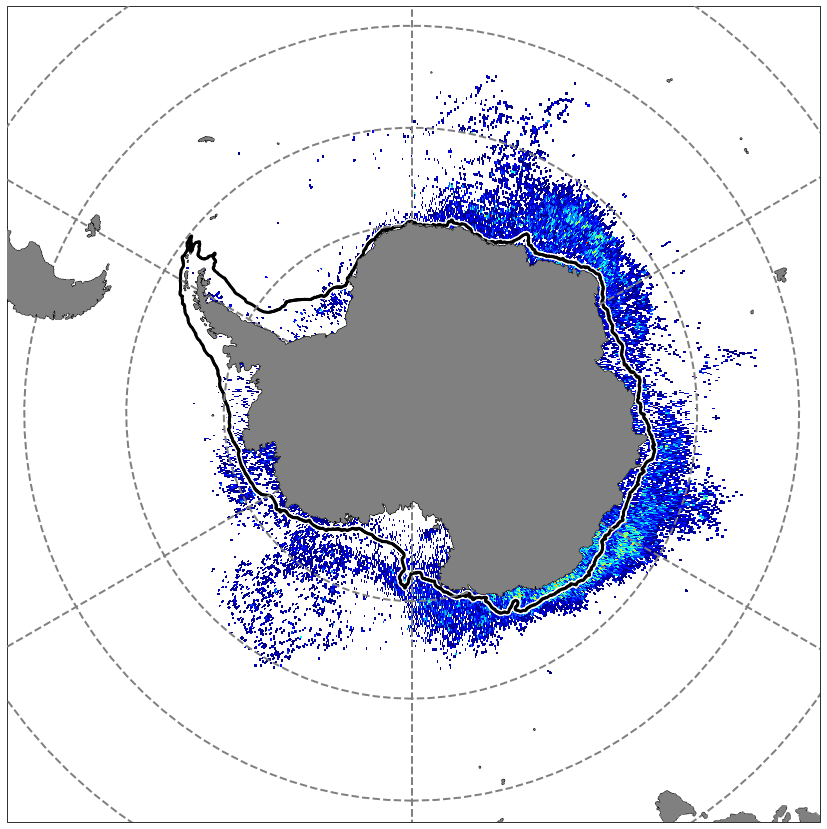

In [35]:
cmin,cmax = 15,150

fig = plt.figure(num=1,figsize=(15,15))
ax = plt.subplot(projection=ccrs.SouthPolarStereo())

c_min,c_max = cmin,cmax
levels = np.arange(cmin,cmax)

xbins,ybins=hist2d_pts_1[1:]

ffmsk = hist2d_pts_95_06.T

#ffmsk[ffmsk<(0.5/1000)*sum(CDW_inds)] = np.nan
ffmsk[ffmsk<cmin] = np.nan

plt.pcolormesh(xbins,ybins,ffmsk,cmap='jet',vmax=c_max,vmin=c_min,zorder=5,
              transform=ccrs.PlateCarree())

# Isobath and background
X,Y = np.meshgrid(xt_ocean,yt_extend)
ax.contourf(X,Y,np.ma.masked_greater(ocean_depth_extend,0),colors='gray',zorder=11,transform=ccrs.PlateCarree()) #Land Mask cmap=cmap_ice
ax.contour(X, Y,ocean_depth_extend,[1],colors='black',linewidths=0.5,zorder=12,transform=ccrs.PlateCarree()) #isoheight of ocean

ax.set_extent([-180, 180, -90, -48], ccrs.PlateCarree())
#Add 1000m isobath
contour =ax.contour(xt_ocean_cc, yt_ocean_cc, shelf_mask.values, [0, 1], colors = 'white', transform=ccrs.PlateCarree(),zorder=6,linewidths=6)
contour2 = ax.contour(xt_ocean_cc, yt_ocean_cc, shelf_mask.values, [0, 1], colors = 'k', transform=ccrs.PlateCarree(),zorder=7,linewidths=3)

# Add contour for specific region
xt_ocean_cc_1 = np.copy(xt_ocean_cc)
xt_ocean_cc_1[xt_ocean_cc_1<0] += 360


# Add grid lines
ax.gridlines(draw_labels=False, linewidth=2, color='gray', alpha=1, linestyle='--',transform=ccrs.PlateCarree(),zorder=10)

#
#plt.title(title)
plt.savefig('Review_SI_ZeuRes_Location_1995_2006_MLS_OFF_cRange_'+str(cmin)+'_'+str(cmax)+'.png',format='png',dpi=300)
plt.show()

### For MLS_Weak Gloal sectors

In [36]:
# To get a correct 2005-2006 CS_Eu_date
var_in_arrs_1_2_MLS_Weak={}
actual_res1 = var_in_arrs_1_MLS_Weak['CS_Eu_date'] - var_in_arrs_2_MLS_Weak['CS_Eu_date'][:,::-1][:,-1][:,np.newaxis]
var_in_arrs_1_2_MLS_Weak['CS_Eu_date'] =  var_in_arrs_2_MLS_Weak['CS_Eu_date'][:,::-1] + actual_res1
#var_in_arrs_1_2_MLS_Weak['datetime'] = var_in_arrs_1_MLS_Weak['datetime']

In [37]:
%%time
res_map_x = np.ravel(np.concatenate((var_in_arrs_3_MLS_Weak['x'][AABW_inds_MLS_Weak][AABW_shallower_than_EZD_plus_CDW_MLS_Weak],var_in_arrs_2_MLS_Weak['x'][AABW_inds_MLS_Weak][AABW_shallower_than_EZD_plus_CDW_MLS_Weak],var_in_arrs_1_MLS_Weak['x'][AABW_inds_MLS_Weak][AABW_shallower_than_EZD_plus_CDW_MLS_Weak]),axis=1),order='C')
res_map_y = np.ravel(np.concatenate((var_in_arrs_3_MLS_Weak['y'][AABW_inds_MLS_Weak][AABW_shallower_than_EZD_plus_CDW_MLS_Weak],var_in_arrs_2_MLS_Weak['y'][AABW_inds_MLS_Weak][AABW_shallower_than_EZD_plus_CDW_MLS_Weak],var_in_arrs_1_MLS_Weak['y'][AABW_inds_MLS_Weak][AABW_shallower_than_EZD_plus_CDW_MLS_Weak]),axis=1),order='C')
res_map_z = np.ravel(np.concatenate((var_in_arrs_3_MLS_Weak['CS_Eu_date'][AABW_shallower_than_EZD_plus_CDW_MLS_Weak],var_in_arrs_2_MLS_Weak['CS_Eu_date'][AABW_shallower_than_EZD_plus_CDW_MLS_Weak],var_in_arrs_1_2_MLS_Weak['CS_Eu_date'][AABW_shallower_than_EZD_plus_CDW_MLS_Weak]),axis=1),order='C')

hist2d_MLS_Weak = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)],weights=res_map_z)
hist2d_pts_MLS_Weak = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)])

CPU times: user 3.84 s, sys: 1.42 s, total: 5.26 s
Wall time: 5.25 s


### AABW_inds_MLS_Weak Plot the Particle . Day plot

In [38]:
PARZ_threshold = PARZ_thre

# Euphotic residence PDF + Backwards PDF
# Visualization
# Global first
part_inds = AABW_inds_MLS_Weak #AABW_shallower_than_EZD
inds_here1 = var_in_arrs_1_MLS_Weak['PARZ'][CDW_inds_MLS_Weak]>PARZ_threshold
res_map_x = np.ravel(var_in_arrs_1_MLS_Weak['x'][AABW_inds_MLS_Weak][CDW_inds_MLS_Weak][inds_here1])
res_map_y = np.ravel(var_in_arrs_1_MLS_Weak['y'][AABW_inds_MLS_Weak][CDW_inds_MLS_Weak][inds_here1])
res_map_z = np.ones(res_map_y.shape)
hist2d_pts_1 = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)])

inds_here2 = var_in_arrs_2_MLS_Weak['PARZ'][CDW_inds_MLS_Weak]>PARZ_threshold
res_map_x = np.ravel(var_in_arrs_2_MLS_Weak['x'][AABW_inds_MLS_Weak][CDW_inds_MLS_Weak][inds_here2])
res_map_y = np.ravel(var_in_arrs_2_MLS_Weak['y'][AABW_inds_MLS_Weak][CDW_inds_MLS_Weak][inds_here2])
res_map_z = np.ones(res_map_y.shape)
hist2d_pts_2 = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)])

inds_here3 = var_in_arrs_3_MLS_Weak['PARZ'][CDW_inds_MLS_Weak][:,var_in_arrs_3['datetime']>dt.datetime(1995,1,1)]>PARZ_threshold
res_map_x = np.ravel(var_in_arrs_3_MLS_Weak['x'][AABW_inds_MLS_Weak][CDW_inds_MLS_Weak][:,var_in_arrs_3['datetime']>dt.datetime(1995,1,1)][inds_here3])
res_map_y = np.ravel(var_in_arrs_3_MLS_Weak['y'][AABW_inds_MLS_Weak][CDW_inds_MLS_Weak][:,var_in_arrs_3['datetime']>dt.datetime(1995,1,1)][inds_here3])
res_map_z = np.ones(res_map_y.shape)
hist2d_pts_3 = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)])

hist2d_pts_95_06 = hist2d_pts_1[0]*5 + hist2d_pts_2[0]*5 + hist2d_pts_3[0]*5

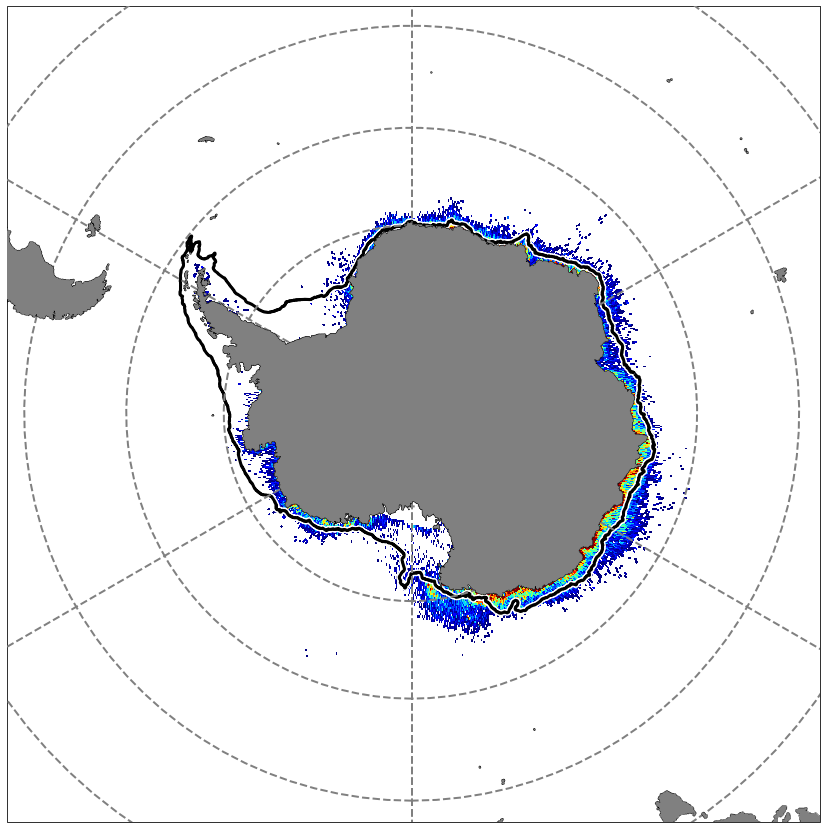

In [39]:
cmin,cmax = 15,150
fig = plt.figure(num=1,figsize=(15,15))
ax = plt.subplot(projection=ccrs.SouthPolarStereo())

c_min,c_max = cmin,cmax
levels = np.arange(cmin,cmax)

xbins,ybins=hist2d_pts_1[1:]

ffmsk = hist2d_pts_95_06.T

#ffmsk[ffmsk<(0.5/1000)*sum(CDW_inds)] = np.nan
ffmsk[ffmsk<cmin] = np.nan

plt.pcolormesh(xbins,ybins,ffmsk,cmap='jet',vmax=c_max,vmin=c_min,zorder=5,
              transform=ccrs.PlateCarree())

# Isobath and background
X,Y = np.meshgrid(xt_ocean,yt_extend)
ax.contourf(X,Y,np.ma.masked_greater(ocean_depth_extend,0),colors='gray',zorder=11,transform=ccrs.PlateCarree()) #Land Mask cmap=cmap_ice
ax.contour(X, Y,ocean_depth_extend,[1],colors='black',linewidths=0.5,zorder=12,transform=ccrs.PlateCarree()) #isoheight of ocean

ax.set_extent([-180, 180, -90, -48], ccrs.PlateCarree())
#Add 1000m isobath
contour =ax.contour(xt_ocean_cc, yt_ocean_cc, shelf_mask.values, [0, 1], colors = 'white', transform=ccrs.PlateCarree(),zorder=6,linewidths=6)
contour2 = ax.contour(xt_ocean_cc, yt_ocean_cc, shelf_mask.values, [0, 1], colors = 'k', transform=ccrs.PlateCarree(),zorder=7,linewidths=3)

# Add contour for specific region
xt_ocean_cc_1 = np.copy(xt_ocean_cc)
xt_ocean_cc_1[xt_ocean_cc_1<0] += 360


# Add grid lines
ax.gridlines(draw_labels=False, linewidth=2, color='gray', alpha=1, linestyle='--',transform=ccrs.PlateCarree(),zorder=10)

#
#plt.title(title)
plt.savefig('Revision_SI_ZeuRes_Location_1995_2006_MLS_Weak_cRange_'+str(cmin)+'_'+str(cmax)+'.png',format='png',dpi=300)
plt.show()